In [31]:
def getCentralization(centrality, c_type):
	
	c_denominator = float(1)
	
	n_val = float(len(centrality))
	
	# print (str(len(centrality)) + "," +  c_type + "\n")
	
	if (c_type=="degree"):
		c_denominator = (n_val-1)*(n_val-2)
		
	if (c_type=="close"):
		c_top = (n_val-1)*(n_val-2)
		c_bottom = (2*n_val)-3	
		c_denominator = float(c_top/c_bottom)
		
	if (c_type=="between"):
		c_denominator = (n_val*n_val*(n_val-2))
  
		
	#start calculations	
		
	c_node_max = max(centrality.values()) #extracting values

	c_sorted = sorted(centrality.values(),reverse=True)
	
	# print ("max node" + str(c_node_max) + "\n")

	c_numerator = 0

	for value in c_sorted:
		
		if c_type == "degree":
			#remove normalisation for each value
			c_numerator += (c_node_max*(n_val-1) - value*(n_val-1))
		else:
			c_numerator += (c_node_max - value)
	
	# print ('numerator:' + str(c_numerator)  + "\n")	
	# print ('denominator:' + str(c_denominator)  + "\n")	

	network_centrality = float(c_numerator/c_denominator)
	
	if c_type == "between":
		network_centrality = network_centrality * 2
		
	return network_centrality


{'Bambara': 0.0, 'Hɔrɔnya': 0.0, 'Ibu': 0.0, 'Ali Farka Ture': 0.0, 'Farikoloɲɛnajɛ': 0.0, 'Dɔkɔtɔrɔya': 0.0, 'Afel Bokum': 0.0, 'Burukina Faso': 0.0, 'Gine Bisau': 0.0, 'Eropa jamanaw': 0.0, 'Huang Sianfan': 0.0, 'Jamaika': 0.0, 'Bolivia': 0.0, 'Folo Bamanana Furu': 0.0, 'Ho Chi Minh-Ville': 0.0, 'Bisigili': 0.0, 'Bamanankan mabεn': 0.0, 'Coritiba Foot Ball Club': 0.0, 'Bogotá': 0.0, 'Biak': 0.0, 'Mandenkan': 0.0, 'Nsirasun': 0.0, 'Kunafonilaseli': 0.0, 'Malik Sidibe': 0.0, 'Mali jamuw': 0.0, 'Jiɲɛ jamanaw': 0.0, 'Latino Amerika': 0.0, 'Komore gun': 0.0, 'Mios Num': 0.0, 'Nyɛ fɔlɔ': 0.0, 'Sinima bamanankan': 0.0, 'Bamanankan': 0.0017482517482517483, 'Kayi': 0.0017482517482517483, 'Mali': 0.0017482517482517483, 'Gine': 0.0017482517482517483, 'Senegal': 0.0017482517482517483, 'Afrika': 0.0017482517482517483, 'Madagaskar': 0.0017482517482517483, 'Alizeri': 0.0017482517482517483, 'Tunizi': 0.0017482517482517483, 'Libya': 0.0017482517482517483, 'Misra': 0.0017482517482517483, 'Asia': 0.001

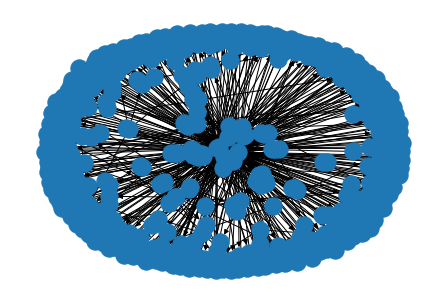

In [43]:
import networkx as nx
import csv
import matplotlib.pyplot as plt

Data = open('graph1.csv', "r")
Graphtype = nx.DiGraph()

G = nx.parse_edgelist(Data, delimiter=',', create_using=Graphtype,nodetype=str, data=(('weight', str),))

# for x in G.nodes():
      # print ("Node:", x, "has total_degree:",G.degree(x), " , In_degree: ", G.out_degree(x)," and out_degree: ", G.in_degree(x)) 
# for u,v in G.edges():
      # print ("Weight of Edge ("+str(u)+","+str(v)+")", G.get_edge_data(u,v))


#computing in-degree-centrality
in_deg_cen = nx.in_degree_centrality(G)
print(dict(list(sorted(in_deg_cen.items(), key=lambda item: item[1]))[0:1000]))
print("In Degree Centralization: ",getCentralization(in_deg_cen,"degree"),"\n");

#computing out-degree-centrality
out_deg_cen = nx.out_degree_centrality(G)
# Printing Top 1000 Articles with highest centrality value
print((list(sorted(out_deg_cen.items(), key=lambda item: item[1], reverse=True))[0:1000]))
print("Out Degree Centralization: ",getCentralization(out_deg_cen,"degree"),"\n");

#closeness centrality
cl_cen = nx.closeness_centrality(G, u=None, distance=None, wf_improved=True)
# Printing Top 1000 Articles with highest centrality value
print((list(sorted(cl_cen.items(), key=lambda item: item[1], reverse=True))[0:1000]))
print("Closeness Centralization: ",getCentralization(cl_cen,"closeness"),"\n");

#betweenness centrality
bt_cen = nx.betweenness_centrality(G, k=None, normalized=True, weight=None, endpoints=False, seed=None)
# Printing Top 1000 Articles with highest centrality value
print((list(sorted(bt_cen.items(), key=lambda item: item[1], reverse=True))[0:1000]))
print("Betweenness Centralization: ",getCentralization(bt_cen,"betweenness"),"\n");

#katz centrality
kat_cen = nx.katz_centrality(G, alpha=0.1, beta=1.0, max_iter=1000, tol=1e-06, nstart=None, normalized=True, weight=None)
# Printing Top 1000 Articles with highest centrality value
print((list(sorted(kat_cen.items(), key=lambda item: item[1], reverse=True))[0:1000]))


nx.draw(G)
plt.show()